In [338]:
import pandas as pd
df = pd.read_csv('ex1data2.txt', header = None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [339]:
m = len(df)

In [340]:
m

47

In [341]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,0,1,2
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900


In [297]:
import numpy as np
np.sum(df, axis=1).head()

0    402008
1    331504
2    371404
3    233419
4    542905
dtype: int64

In [312]:
y = df.iloc[:, 3]
y.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: 2, dtype: int64

In [313]:
X = df.drop(columns=2)
X.head()

,00,0,1
0,1,2104,3
1,1,1600,3
2,1,2400,3
3,1,1416,2
4,1,3000,4


In [342]:
for i in range(1, len(X.columns)):
    X[i-1] = X[i-1]/np.max(X[i-1])

In [343]:
X.head()

,00,0,1
0,1,0.469853,0.6
1,1,0.357302,0.6
2,1,0.535954,0.6
3,1,0.316213,0.4
4,1,0.669942,0.8


In [318]:
import numpy as np
np.array([0]*len(X.columns))

array([0, 0, 0])

In [344]:
theta = np.array([0]*len(X.columns))

In [345]:
y1 = theta*X
y1=np.sum(y1, axis=1)

In [346]:
cost = sum(np.sqrt((y1-y)**2))/(2*len(df))
cost

170206.32978723405

In [347]:
alpha=0.01
0-alpha*(sum((y1-y)*X.iloc[:,0])/47) 

3404.1265957446813

In [323]:
def hypothesis(theta, X):
    return theta*X

In [324]:
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

In [357]:
alpha=0.05
i=1500
theta = np.array([0.0]*len(X.columns))
def gradientDescent(X, y, theta, alpha, i):
    #theta = np.array([0]*len(X.columns))
    J = []
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [358]:
J, j, theta = gradientDescent(X, y, theta, 0.05, 1000)

In [359]:
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

In [360]:
range(len(y))

range(0, 47)

In [361]:
y_hat

0     347494.418435
1     299747.149535
2     375536.465249
3     260949.323725
4     453744.735230
5     357587.040918
6     293494.530988
7     283357.710012
8     278905.087713
9     289705.065203
10    353323.891909
11    337641.807392
12    327220.776481
13    615131.779207
14    268294.583514
15    387429.083980
16    251854.605839
17    265263.010885
18    416702.707175
19    456681.571214
20    315568.169190
21    305665.019996
22    300126.096113
23    355408.098091
24    516694.065766
25    252378.827214
26    286294.545996
27    387473.282474
28    356589.136320
29    397989.050029
30    301022.924408
31    200172.596358
32    362797.556373
33    445357.372350
34    341102.864750
35    284305.076458
36    265547.220819
37    371513.327680
38    568849.758471
39    374355.427020
40    284444.011596
41    360189.128817
42    412723.768100
43    261852.491678
44    207517.856146
45    344987.067181
46    262136.701612
dtype: float64

In [362]:
len(y)

47

In [363]:
len(y_hat)

47

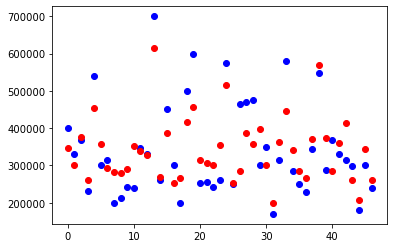

In [364]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 47)),y= y, color='blue')         
plt.scatter(x=list(range(0, 47)), y=y_hat, color='red')
plt.show()

In [365]:
X2 = df.drop(columns=2)

In [366]:
X1 = np.sum(X, axis=1)

In [367]:
X2_sum = np.sum(X2, axis=1)

In [368]:
cost = sum(np.sqrt((y_hat-y)**2))/(2*len(df))
cost

29467.912696592593

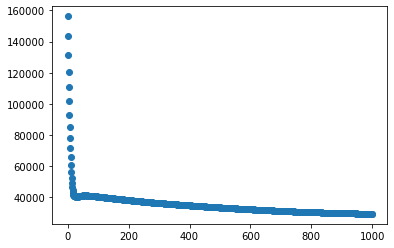

In [369]:
plt.figure()
plt.scatter(x=list(range(0, 1000)), y=J)
plt.show()